In [1]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = snowflake.connector.connect(
    user="MARYAN",
    password="Hejsan123",
    account="DRXDGZU-CS03614",
    database="assesment_python",
    schema="assesment_python"
)

cur = conn.cursor()
cur.execute('select * from "spotify_song_1"')

df = cur.fetch_pandas_all()

conn.close()

In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32833 non-null  object 
 2   track_artist              32833 non-null  object 
 3   track_popularity          32833 non-null  int8   
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32833 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int8   
 14  loudne

#### What are the top 5 most popular artists?

In [10]:
group_by_artist = df.groupby("track_artist", as_index=False).agg({"track_popularity":"mean"})
group_by_artist = group_by_artist.sort_values(by="track_popularity", ascending=False)
top_5_artist = group_by_artist.head(5)
print(top_5_artist)



        track_artist  track_popularity
9735   Trevor Daniel         97.000000
10243            Y2K         91.000000
2601     Don Toliver         90.714286
7959     Roddy Ricch         88.210526
2209          DaBaby         87.857143


#### Showing a bar chart of the top 5 artists by average popularity

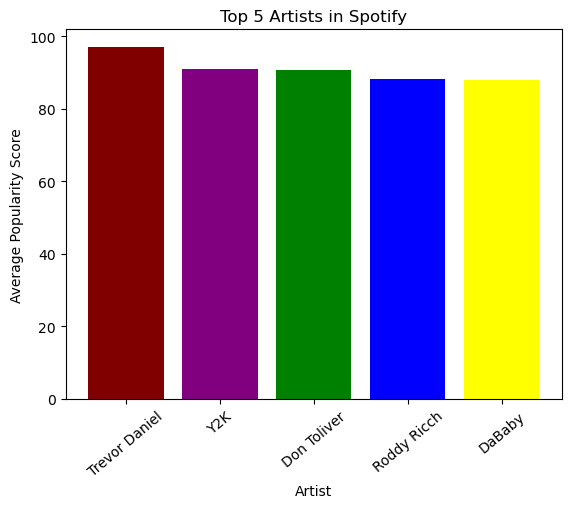

In [5]:
color = ["maroon", "purple", "green", "blue", "yellow"]

plt.bar(top_5_artist["track_artist"], top_5_artist["track_popularity"], color=color)
plt.xticks(rotation=40)
plt.xlabel("Artist")
plt.ylabel("Average Popularity Score")
plt.title("Top 5 Artists in Spotify")
plt.show()


#### What genres are the top 5 most popular artists working in?

In [13]:
track_5_artist = df[df['track_artist'].isin(top_artists)]

count_genre = track_5_artist['playlist_genre'].value_counts()

print(count_genre)


playlist_genre
rap      24
r&b      13
latin     7
edm       6
pop       3
Name: count, dtype: int64


#### Show a piechart

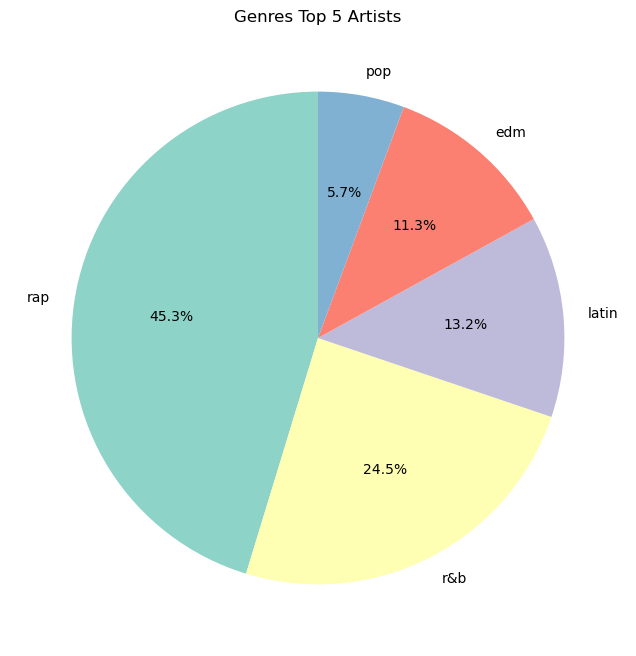

In [35]:

plt.figure(figsize=(8, 8))
plt.pie(count_genre, labels=count_genre.index, autopct="%1.1f%%", startangle=90, colors=custom_palette)
plt.title("Genres Top 5 Artists")
plt.show()




#### Are songs getting shorter?

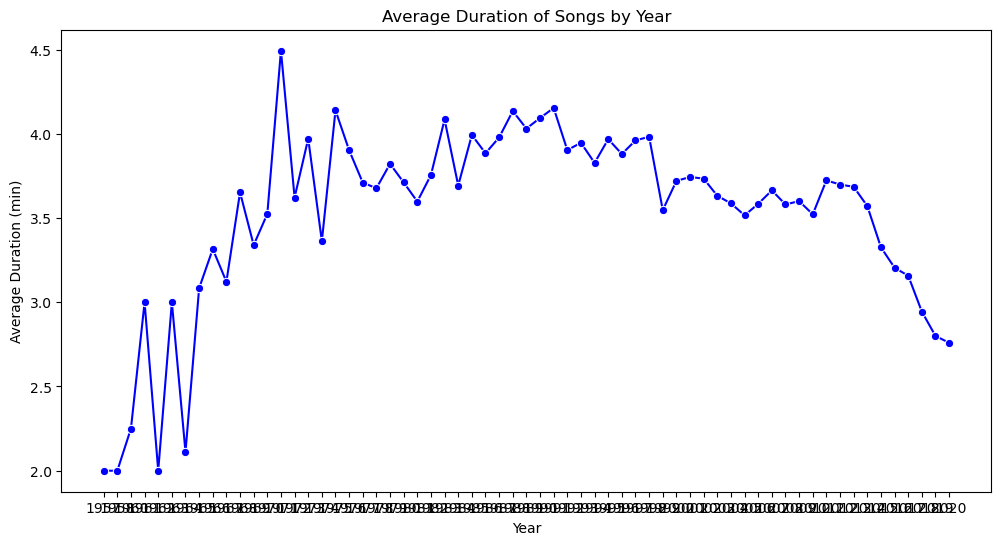

In [34]:
average_duration_by_year = df.groupby("track_album_release_date")["duration_min"].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=average_duration_by_year.index, y=average_duration_by_year.values, marker='o', color='blue')
plt.title('Average Duration of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (min)')
plt.show()

#### How has genres evolved over time?

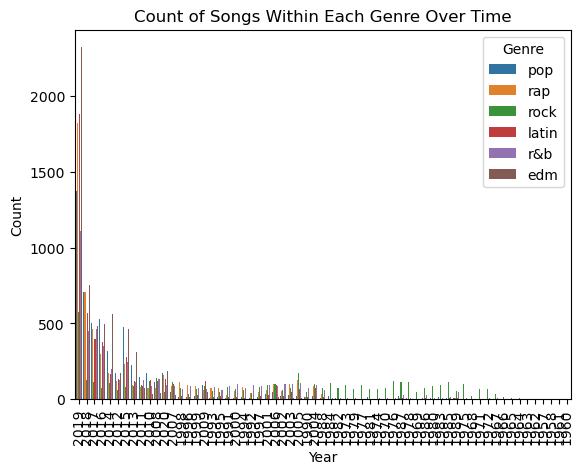

In [39]:
genre_year_count = df.groupby(["playlist_genre", "track_album_release_date"]).size().reset_index(name="song_count")

sns.countplot(x="track_album_release_date", hue="playlist_genre", data=df)
plt.title("Count of Songs Within Each Genre Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Genre", bbox_to_anchor=(1, 1))
plt.show()

#### What are the most danceable genres?

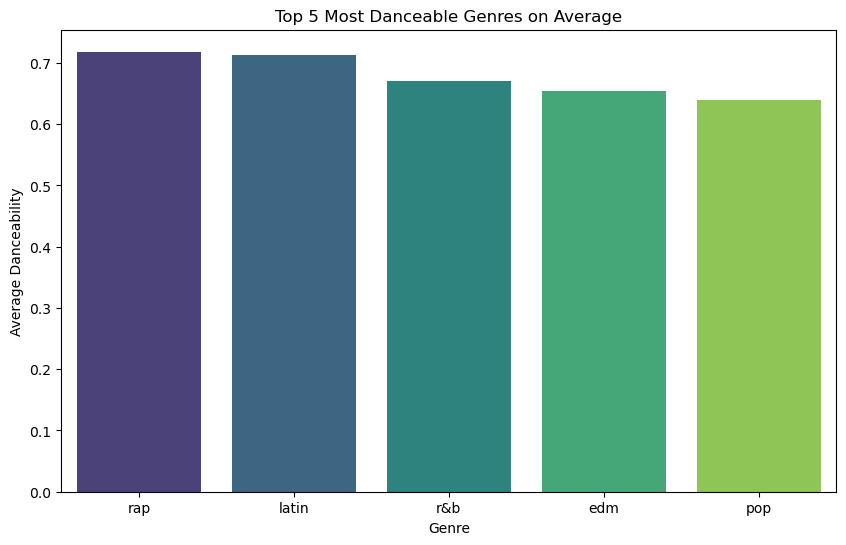

In [41]:
average_danceability = df.groupby('playlist_genre')['danceability'].mean()

top_danceable_genres = average_danceability.nlargest(5)

# Plot a vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_danceable_genres.index, y=top_danceable_genres.values, palette='viridis')
plt.title('Top 5 Most Danceable Genres on Average')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.show()